In [34]:
#pip install matplot

In [35]:
#pip install networkx

In [36]:
# pip install graphviz

In [37]:
import os
import graphviz

# Set the Graphviz executable path
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'


In [38]:
import time
from cryptography.hazmat.primitives.asymmetric import dh, rsa, ec
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.backends import default_backend
import os
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
import psutil
from graphviz import Digraph

#### Derive Key

In [39]:
def derive_key(shared_secret):
    salt = b'some_salt'  # Use a constant salt value for simplicity in this example
    kdf = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,
        salt=salt,
        iterations=100000,
        backend=default_backend()
    )
    key = kdf.derive(shared_secret)
    return key

#### Diffle Hellman Key

In [40]:
def diffie_hellman_key_exchange():
    parameters = dh.generate_parameters(generator=2, key_size=2048, backend=default_backend())
    private_key_a = parameters.generate_private_key()
    public_key_a = private_key_a.public_key()
    private_key_b = parameters.generate_private_key()
    public_key_b = private_key_b.public_key()
    shared_secret_a = private_key_a.exchange(public_key_b)
    shared_secret_b = private_key_b.exchange(public_key_a)
    assert shared_secret_a == shared_secret_b

    return {
        'p': parameters.parameter_numbers().p,
        'g': parameters.parameter_numbers().g,
        'private_key_a': private_key_a,
        'private_key_b': private_key_b,
        'public_key_a': public_key_a,
        'public_key_b': public_key_b,
        'shared_secret_a': shared_secret_a,
        'shared_secret_b': shared_secret_b
    }


In [41]:
from graphviz import Digraph
from PIL import Image

# Create a new directed graph with custom styles
flowchart = Digraph(comment='Diffie-Hellman Key Exchange')

# Custom node style (rounded shape, different colors)
flowchart.attr('node', shape='ellipse', style='filled', fontcolor='black')

# Set up the nodes with custom colors
flowchart.node('A', 'Start: Diffie-Hellman Key Exchange', color='lightyellow')
flowchart.node('B', 'Generate Parameters (p, g)', color='lightgreen')
flowchart.node('C', 'Generate Private Key A', color='lightblue')
flowchart.node('D', 'Generate Public Key A from Private Key A', color='lightblue')
flowchart.node('E', 'Generate Private Key B', color='lightblue')
flowchart.node('F', 'Generate Public Key B from Private Key B', color='lightblue')
flowchart.node('G', 'Exchange Shared Secret for Party A', color='lightcoral')
flowchart.node('H', 'Exchange Shared Secret for Party B', color='lightcoral')
flowchart.node('I', 'Verify: Shared Secret A == Shared Secret B', color='lightpink')
flowchart.node('J', 'Return Parameters and Shared Secrets', color='green')

# Custom edge styles
flowchart.attr('edge', color='darkblue', penwidth='2')

# Add arrows between nodes
flowchart.edge('A', 'B', label='Step 1')
flowchart.edge('B', 'C', label='Step 2')
flowchart.edge('C', 'D', label='Step 3')
flowchart.edge('B', 'E', label='Step 2')
flowchart.edge('E', 'F', label='Step 3')
flowchart.edge('D', 'G', label='Step 4')
flowchart.edge('F', 'H', label='Step 4')
flowchart.edge('G', 'I', label='Step 5')
flowchart.edge('H', 'I', label='Step 5')
flowchart.edge('I', 'J', label='Step 6')

# Render and save the flowchart as a PNG file
flowchart.render('diffie_hellman_flowchart', format='png', cleanup=False)

# Open and display the image using PIL
img = Image.open('diffie_hellman_flowchart.png')
display.display(img)
# img.show()


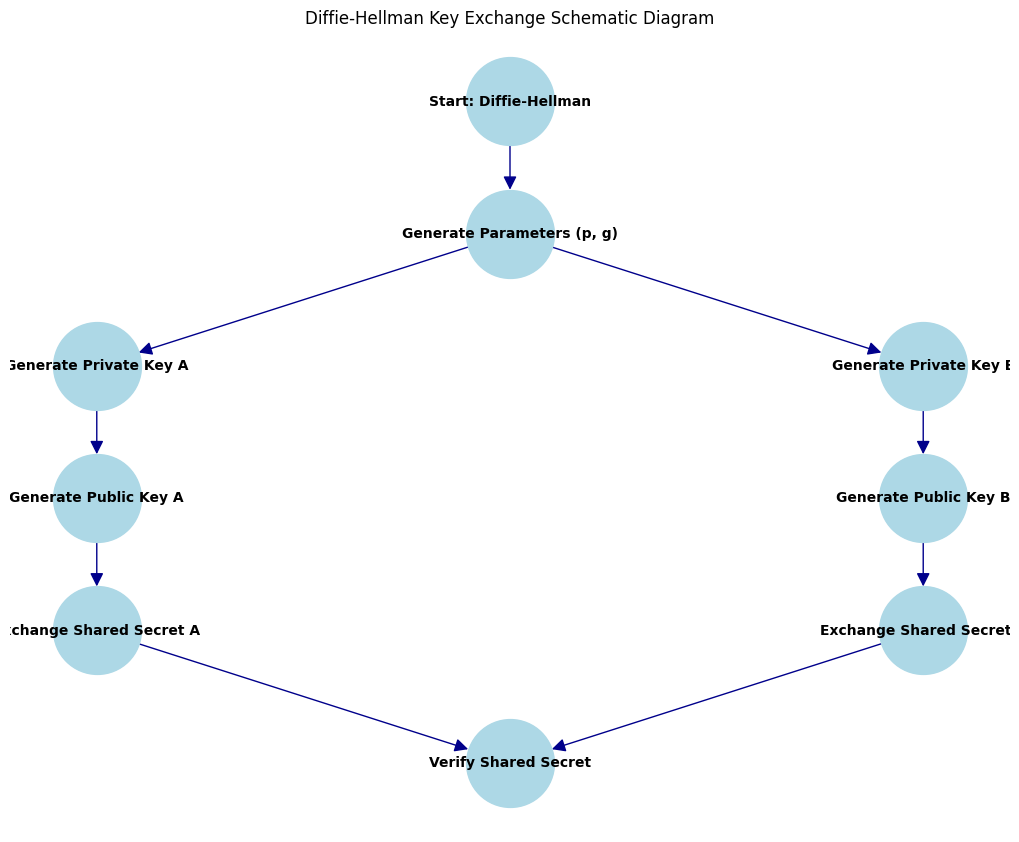

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new directed graph for Diffie-Hellman
G = nx.DiGraph()

# Add nodes for each stage
G.add_node('Start: Diffie-Hellman')
G.add_node('Generate Parameters (p, g)')
G.add_node('Generate Private Key A')
G.add_node('Generate Public Key A')
G.add_node('Generate Private Key B')
G.add_node('Generate Public Key B')
G.add_node('Exchange Shared Secret A')
G.add_node('Exchange Shared Secret B')
G.add_node('Verify Shared Secret')

# Add edges between nodes to represent process flow
G.add_edges_from([
    ('Start: Diffie-Hellman', 'Generate Parameters (p, g)'),
    ('Generate Parameters (p, g)', 'Generate Private Key A'),
    ('Generate Private Key A', 'Generate Public Key A'),
    ('Generate Parameters (p, g)', 'Generate Private Key B'),
    ('Generate Private Key B', 'Generate Public Key B'),
    ('Generate Public Key A', 'Exchange Shared Secret A'),
    ('Generate Public Key B', 'Exchange Shared Secret B'),
    ('Exchange Shared Secret A', 'Verify Shared Secret'),
    ('Exchange Shared Secret B', 'Verify Shared Secret')
])

# Define positions for nodes to improve layout
pos = {
    'Start: Diffie-Hellman': (0, 5),
    'Generate Parameters (p, g)': (0, 4),
    'Generate Private Key A': (-1, 3),
    'Generate Public Key A': (-1, 2),
    'Generate Private Key B': (1, 3),
    'Generate Public Key B': (1, 2),
    'Exchange Shared Secret A': (-1, 1),
    'Exchange Shared Secret B': (1, 1),
    'Verify Shared Secret': (0, 0)
}

# Draw the graph with color and labels
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=4000, font_size=10, font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=20, edge_color='darkblue')
plt.title("Diffie-Hellman Key Exchange Schematic Diagram")
plt.show()


#### RSA

In [43]:
def rsa_key_exchange():
    private_key_a = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
    public_key_a = private_key_a.public_key()
    private_key_b = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
    public_key_b = private_key_b.public_key()

    return {
        'private_key_a': private_key_a,
        'private_key_b': private_key_b,
        'public_key_a': public_key_a,
        'public_key_b': public_key_b
    }


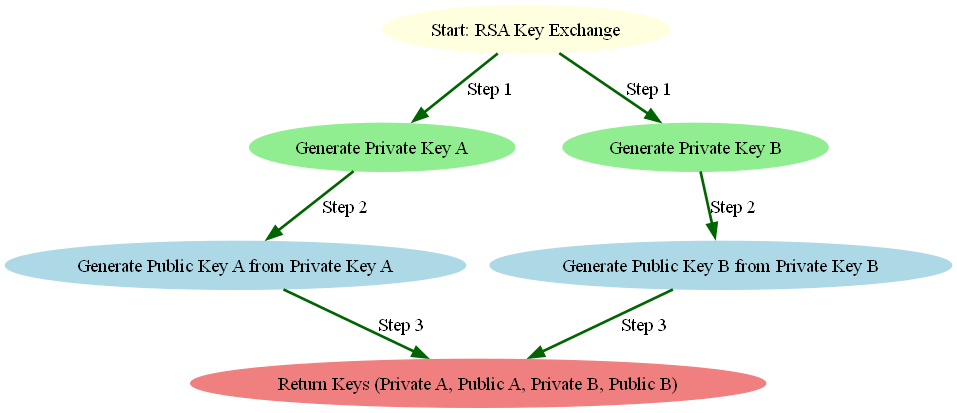

In [44]:

# Create a new directed graph with custom styles
flowchart = Digraph(comment='RSA Key Exchange')

# Custom node style (rounded shape, different colors)
flowchart.attr('node', shape='ellipse', style='filled', color='lightblue', fontcolor='black')

# Set up the nodes with custom colors and shapes
flowchart.node('A', 'Start: RSA Key Exchange', color='lightyellow')
flowchart.node('B', 'Generate Private Key A', color='lightgreen')
flowchart.node('C', 'Generate Public Key A from Private Key A', color='lightblue')
flowchart.node('D', 'Generate Private Key B', color='lightgreen')
flowchart.node('E', 'Generate Public Key B from Private Key B', color='lightblue')
flowchart.node('F', 'Return Keys (Private A, Public A, Private B, Public B)', color='lightcoral')

# Custom edge styles
flowchart.attr('edge', color='darkgreen', penwidth='2')

# Add arrows between nodes
flowchart.edge('A', 'B', label='Step 1')
flowchart.edge('B', 'C', label='Step 2')
flowchart.edge('A', 'D', label='Step 1')
flowchart.edge('D', 'E', label='Step 2')
flowchart.edge('C', 'F', label='Step 3')
flowchart.edge('E', 'F', label='Step 3')

# Render and save the flowchart as a PNG file
flowchart.render('rsa_key_exchange_flowchart', format='png', cleanup=False)

# Display the image in Colab
from PIL import Image
import IPython.display as display

img = Image.open('rsa_key_exchange_flowchart.png')
display.display(img)


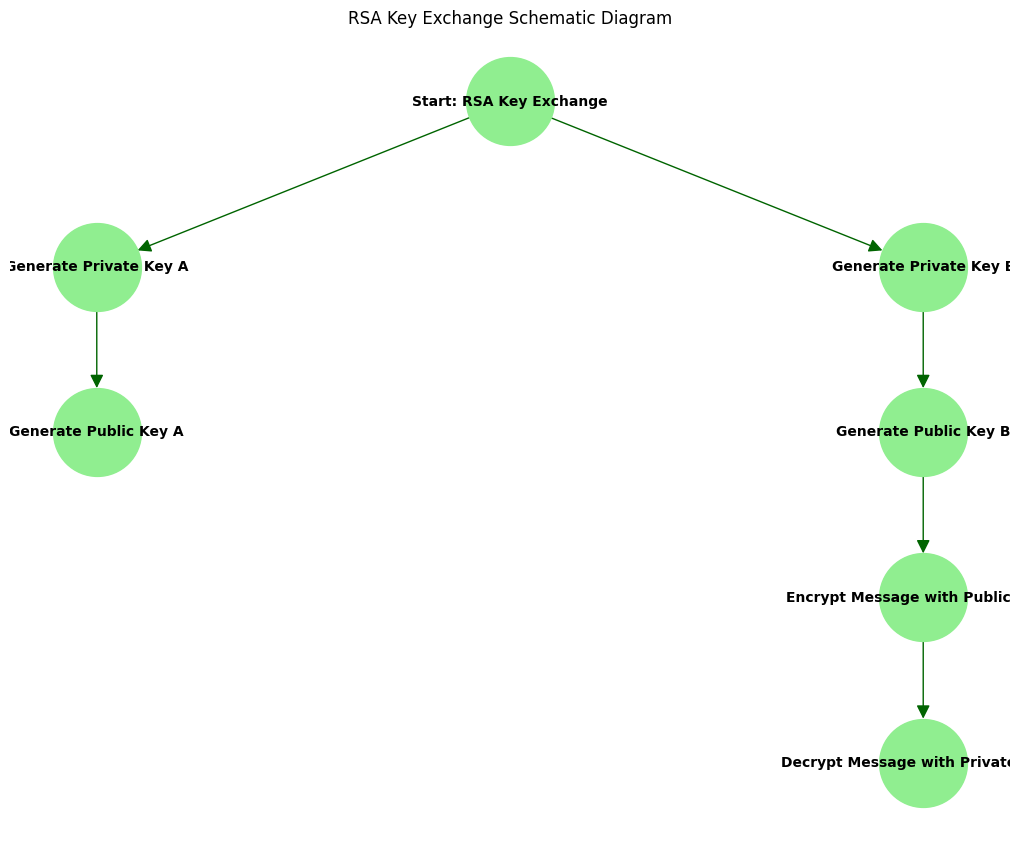

In [45]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new directed graph for RSA
G = nx.DiGraph()

# Add nodes for each stage
G.add_node('Start: RSA Key Exchange')
G.add_node('Generate Private Key A')
G.add_node('Generate Public Key A')
G.add_node('Generate Private Key B')
G.add_node('Generate Public Key B')
G.add_node('Encrypt Message with Public Key B')
G.add_node('Decrypt Message with Private Key B')

# Add edges between nodes to represent process flow
G.add_edges_from([
    ('Start: RSA Key Exchange', 'Generate Private Key A'),
    ('Generate Private Key A', 'Generate Public Key A'),
    ('Start: RSA Key Exchange', 'Generate Private Key B'),
    ('Generate Private Key B', 'Generate Public Key B'),
    ('Generate Public Key B', 'Encrypt Message with Public Key B'),
    ('Encrypt Message with Public Key B', 'Decrypt Message with Private Key B')
])

# Define positions for nodes to improve layout
pos = {
    'Start: RSA Key Exchange': (0, 5),
    'Generate Private Key A': (-1, 4),
    'Generate Public Key A': (-1, 3),
    'Generate Private Key B': (1, 4),
    'Generate Public Key B': (1, 3),
    'Encrypt Message with Public Key B': (1, 2),
    'Decrypt Message with Private Key B': (1, 1)
}

# Draw the graph with color and labels
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=4000, font_size=10, font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=20, edge_color='darkgreen')
plt.title("RSA Key Exchange Schematic Diagram")
plt.show()


#### ECDH

In [46]:
def ecdh_key_exchange():
    private_key_a = ec.generate_private_key(ec.SECP256R1(), default_backend())
    public_key_a = private_key_a.public_key()
    private_key_b = ec.generate_private_key(ec.SECP256R1(), default_backend())
    public_key_b = private_key_b.public_key()
    shared_secret_a = private_key_a.exchange(ec.ECDH(), public_key_b)
    shared_secret_b = private_key_b.exchange(ec.ECDH(), public_key_a)
    assert shared_secret_a == shared_secret_b

    return {
        'private_key_a': private_key_a,
        'private_key_b': private_key_b,
        'public_key_a': public_key_a,
        'public_key_b': public_key_b,
        'shared_secret_a': shared_secret_a,
        'shared_secret_b': shared_secret_b
    }


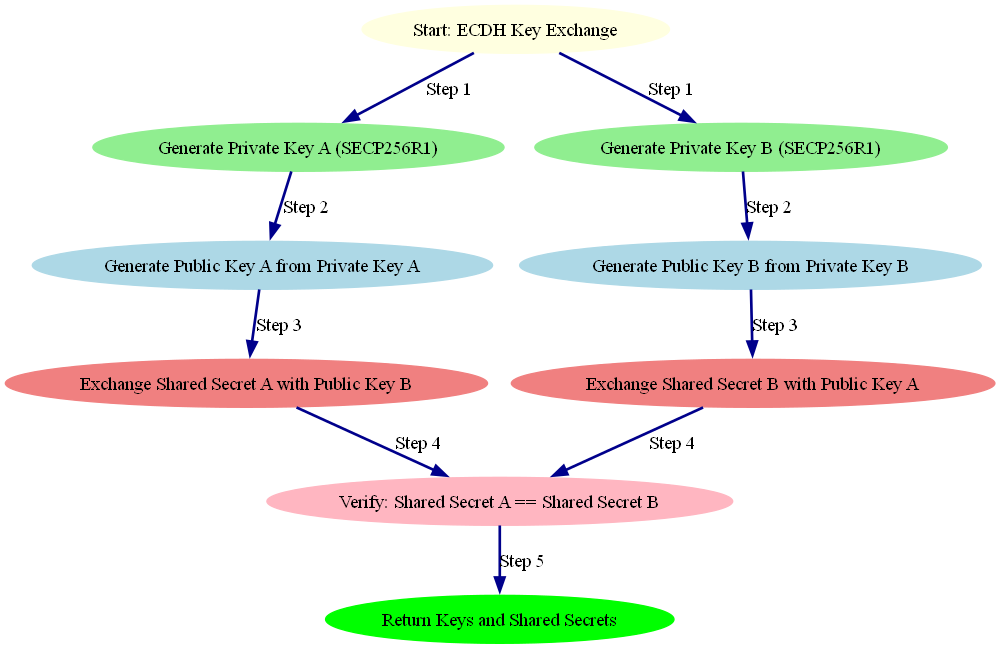

In [47]:

# Create a new directed graph with custom styles
flowchart = Digraph(comment='ECDH Key Exchange')

# Custom node style (rounded shape, different colors)
flowchart.attr('node', shape='ellipse', style='filled', fontcolor='black')

# Set up the nodes with custom colors and shapes
flowchart.node('A', 'Start: ECDH Key Exchange', color='lightyellow')
flowchart.node('B', 'Generate Private Key A (SECP256R1)', color='lightgreen')
flowchart.node('C', 'Generate Public Key A from Private Key A', color='lightblue')
flowchart.node('D', 'Generate Private Key B (SECP256R1)', color='lightgreen')
flowchart.node('E', 'Generate Public Key B from Private Key B', color='lightblue')
flowchart.node('F', 'Exchange Shared Secret A with Public Key B', color='lightcoral')
flowchart.node('G', 'Exchange Shared Secret B with Public Key A', color='lightcoral')
flowchart.node('H', 'Verify: Shared Secret A == Shared Secret B', color='lightpink', fontcolor='black')
flowchart.node('I', 'Return Keys and Shared Secrets', color='green')

# Custom edge styles
flowchart.attr('edge', color='darkblue', penwidth='2')

# Add arrows between nodes
flowchart.edge('A', 'B', label='Step 1')
flowchart.edge('B', 'C', label='Step 2')
flowchart.edge('A', 'D', label='Step 1')
flowchart.edge('D', 'E', label='Step 2')
flowchart.edge('C', 'F', label='Step 3')
flowchart.edge('E', 'G', label='Step 3')
flowchart.edge('F', 'H', label='Step 4')
flowchart.edge('G', 'H', label='Step 4')
flowchart.edge('H', 'I', label='Step 5')

# Render and save the flowchart as a PNG file
flowchart.render('ecdh_key_exchange_flowchart', format='png', cleanup=False)

# Display the image in Colab
from PIL import Image
import IPython.display as display

img = Image.open('ecdh_key_exchange_flowchart.png')
display.display(img)


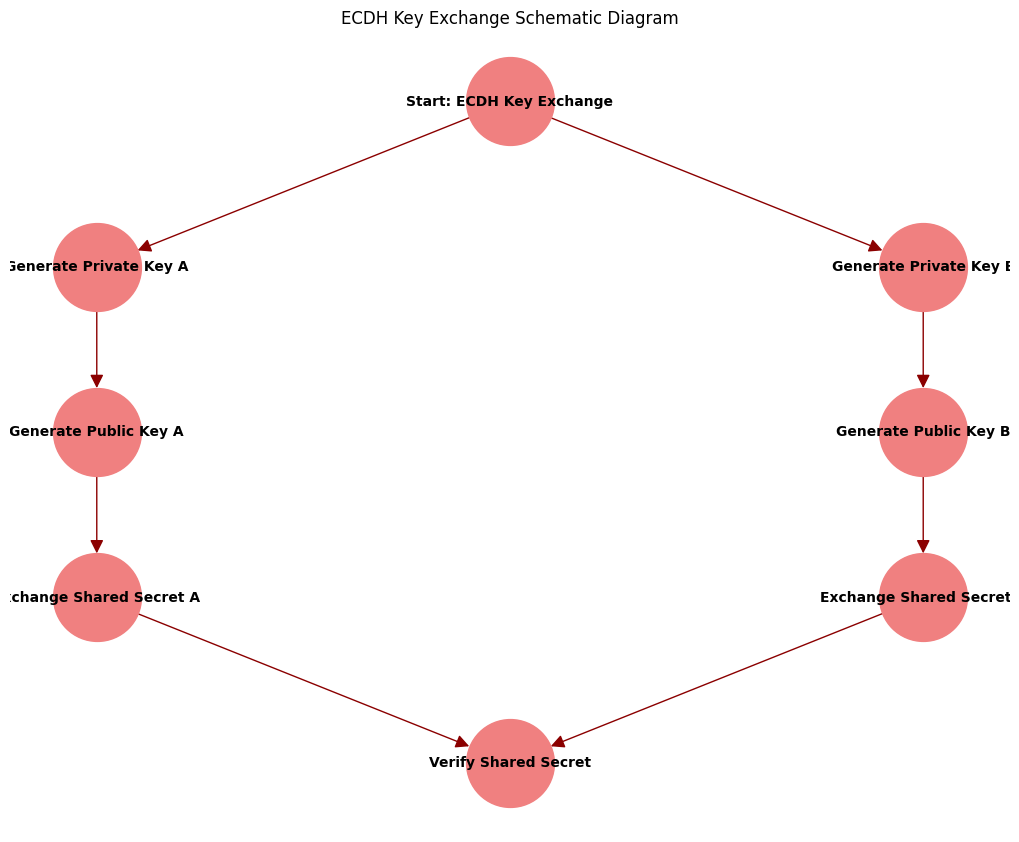

In [48]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a new directed graph for ECDH
G = nx.DiGraph()

# Add nodes for each stage
G.add_node('Start: ECDH Key Exchange')
G.add_node('Generate Private Key A')
G.add_node('Generate Public Key A')
G.add_node('Generate Private Key B')
G.add_node('Generate Public Key B')
G.add_node('Exchange Shared Secret A')
G.add_node('Exchange Shared Secret B')
G.add_node('Verify Shared Secret')

# Add edges between nodes to represent process flow
G.add_edges_from([
    ('Start: ECDH Key Exchange', 'Generate Private Key A'),
    ('Generate Private Key A', 'Generate Public Key A'),
    ('Start: ECDH Key Exchange', 'Generate Private Key B'),
    ('Generate Private Key B', 'Generate Public Key B'),
    ('Generate Public Key A', 'Exchange Shared Secret A'),
    ('Generate Public Key B', 'Exchange Shared Secret B'),
    ('Exchange Shared Secret A', 'Verify Shared Secret'),
    ('Exchange Shared Secret B', 'Verify Shared Secret')
])

# Define positions for nodes to improve layout
pos = {
    'Start: ECDH Key Exchange': (0, 5),
    'Generate Private Key A': (-1, 4),
    'Generate Public Key A': (-1, 3),
    'Generate Private Key B': (1, 4),
    'Generate Public Key B': (1, 3),
    'Exchange Shared Secret A': (-1, 2),
    'Exchange Shared Secret B': (1, 2),
    'Verify Shared Secret': (0, 1)
}

# Draw the graph with color and labels
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightcoral', node_size=4000, font_size=10, font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=20, edge_color='darkred')
plt.title("ECDH Key Exchange Schematic Diagram")
plt.show()


#### Encrypt Message

In [49]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

def encrypt_message(shared_secret, message):
    derived_key = derive_key(shared_secret)
    print(f"Derived Key (Encryption, hex): {derived_key.hex()}")
    iv = os.urandom(16)
    cipher = Cipher(algorithms.AES(derived_key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = iv + encryptor.update(message) + encryptor.finalize()
    return ciphertext

#### Decrpt Message

In [50]:
# Decryption Function with Key and IV Debugging
def decrypt_message(shared_secret, ciphertext):
    derived_key = derive_key(shared_secret)
    print(f"Derived Key (Decryption, hex): {derived_key.hex()}")
    iv = ciphertext[:16]
    cipher = Cipher(algorithms.AES(derived_key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    decrypted_message = decryptor.update(ciphertext[16:]) + decryptor.finalize()
    print(f"Decrypted Message: {decrypted_message}")
    return decrypted_message

##### Test Diffle Helman

In [51]:
def test_diffie_hellman():
    start_time = time.time()
    results = diffie_hellman_key_exchange()
    end_time = time.time()
    execution_time = end_time - start_time
    message = b"this is a boy"
    ciphertext = encrypt_message(results['shared_secret_a'], message)
    decrypted_message = decrypt_message(results['shared_secret_a'], ciphertext)

    return {
        'algorithm': 'Diffie-Hellman',
        'execution_time': execution_time,
        'ciphertext': ciphertext,
        'ciphertext_length': len(ciphertext),
        'decrypted_message': decrypted_message,
        'message_integrity': message == decrypted_message
    }

#### Test RSA

In [52]:
def test_rsa():
    start_time = time.time()
    results = rsa_key_exchange()
    end_time = time.time()
    execution_time = end_time - start_time
    message = b"this is a boy"

    # RSA encryption/decryption with padding
    ciphertext = results['public_key_a'].encrypt(
        message,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    decrypted_message = results['private_key_a'].decrypt(
        ciphertext,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )

    return {
        'algorithm': 'RSA',
        'execution_time': execution_time,
        'ciphertext': ciphertext,
        'ciphertext_length': len(ciphertext),
        'decrypted_message': decrypted_message,
        'message_integrity': message == decrypted_message
    }

##### Test ECDH

In [53]:
def test_ecdh():
    start_time = time.time()
    results = ecdh_key_exchange()
    end_time = time.time()
    execution_time = end_time - start_time
    message = b"this is a boy"
    ciphertext = encrypt_message(results['shared_secret_a'], message)
    decrypted_message = decrypt_message(results['shared_secret_a'], ciphertext)

    return {
        'algorithm': 'ECDH',
        'execution_time': execution_time,
        'ciphertext': ciphertext,
        'ciphertext_length': len(ciphertext),
        'decrypted_message': decrypted_message,
        'message_integrity': message == decrypted_message
    }

#### Testing Functions

In [54]:
# Perform tests
diffie_hellman_results = test_diffie_hellman()
rsa_results = test_rsa()
ecdh_results = test_ecdh()

Derived Key (Encryption, hex): 155ddc40f20822b99c1aa55ff52c6b26d21f8a3433a4e2b40f9890ba25c8963e
Derived Key (Decryption, hex): 155ddc40f20822b99c1aa55ff52c6b26d21f8a3433a4e2b40f9890ba25c8963e
Decrypted Message: b'this is a boy'
Derived Key (Encryption, hex): 46491654abf3b5b059e2099e7c1b149bf1f180690bdb6930804d5b586ffd0e7f
Derived Key (Decryption, hex): 46491654abf3b5b059e2099e7c1b149bf1f180690bdb6930804d5b586ffd0e7f
Decrypted Message: b'this is a boy'


#### Message Integrity Check Function

In [55]:
def check_message_integrity(original_message, decrypted_message):
    return original_message == decrypted_message


 #### Conduct Integrity Check

In [56]:
dh_integrity = check_message_integrity(b"this is a boy", diffie_hellman_results['decrypted_message'])
rsa_integrity = check_message_integrity(b"this is a boy", rsa_results['decrypted_message'])
ecdh_integrity = check_message_integrity(b"this is a boy", ecdh_results['decrypted_message'])


#### Print Integrity Check Results

In [57]:
print("\nIntegrity Check Results:")
print(f"Diffie-Hellman Integrity: {'Passed' if dh_integrity else 'Failed'}")
print(f"RSA Integrity: {'Passed' if rsa_integrity else 'Failed'}")
print(f"ECDH Integrity: {'Passed' if ecdh_integrity else 'Failed'}")



Integrity Check Results:
Diffie-Hellman Integrity: Passed
RSA Integrity: Passed
ECDH Integrity: Passed


In [58]:
# Print results
print("Diffie-Hellman Results:")
print(f"Execution Time: {diffie_hellman_results['execution_time']:.4f} seconds")
print(f"Ciphertext Length: {diffie_hellman_results['ciphertext_length']} bytes")
print(f"Message Integrity Check: {'Passed' if dh_integrity else 'Failed'}")

print("\nRSA Results:")
print(f"Execution Time: {rsa_results['execution_time']:.4f} seconds")
print(f"Ciphertext Length: {rsa_results['ciphertext_length']} bytes")
print(f"Message Integrity Check: {'Passed' if rsa_integrity else 'Failed'}")

print("\nECDH Results:")
print(f"Execution Time: {ecdh_results['execution_time']:.4f} seconds")
print(f"Ciphertext Length: {ecdh_results['ciphertext_length']} bytes")
print(f"Message Integrity Check: {'Passed' if ecdh_integrity else 'Failed'}")
print("\n")

# Discussion points
print("Discussion:")
print("- Diffie-Hellman and ECDH have similar execution times and ciphertext lengths.")
print("- RSA produces the longest ciphertext due to its encryption method and is slower.")
print("- All algorithms passed the message integrity check, confirming secure communication.")

Diffie-Hellman Results:
Execution Time: 71.4709 seconds
Ciphertext Length: 29 bytes
Message Integrity Check: Passed

RSA Results:
Execution Time: 0.1373 seconds
Ciphertext Length: 256 bytes
Message Integrity Check: Passed

ECDH Results:
Execution Time: 0.0117 seconds
Ciphertext Length: 29 bytes
Message Integrity Check: Passed


Discussion:
- Diffie-Hellman and ECDH have similar execution times and ciphertext lengths.
- RSA produces the longest ciphertext due to its encryption method and is slower.
- All algorithms passed the message integrity check, confirming secure communication.


In [59]:
# Plotting performance comparison
algorithms = ['Diffie-Hellman', 'RSA', 'ECDH']
execution_times = [
    diffie_hellman_results['execution_time'],
    rsa_results['execution_time'],
    ecdh_results['execution_time']
]

In [60]:

# Collect data for analysis
test_results = [diffie_hellman_results, rsa_results, ecdh_results]


##### Visualization - Execution Time Comparison

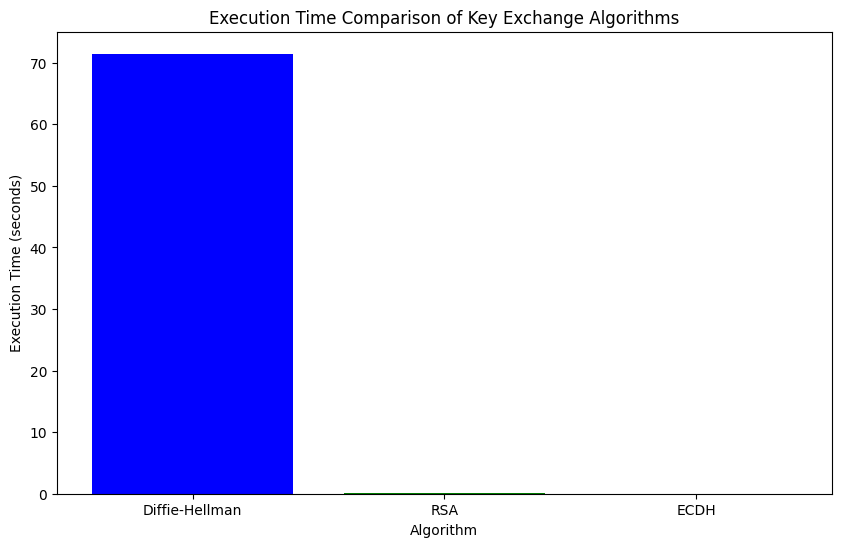

In [61]:
# Plotting performance comparison
algorithms = [result['algorithm'] for result in test_results]
execution_times = [result['execution_time'] for result in test_results]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, execution_times, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison of Key Exchange Algorithms')
plt.show()


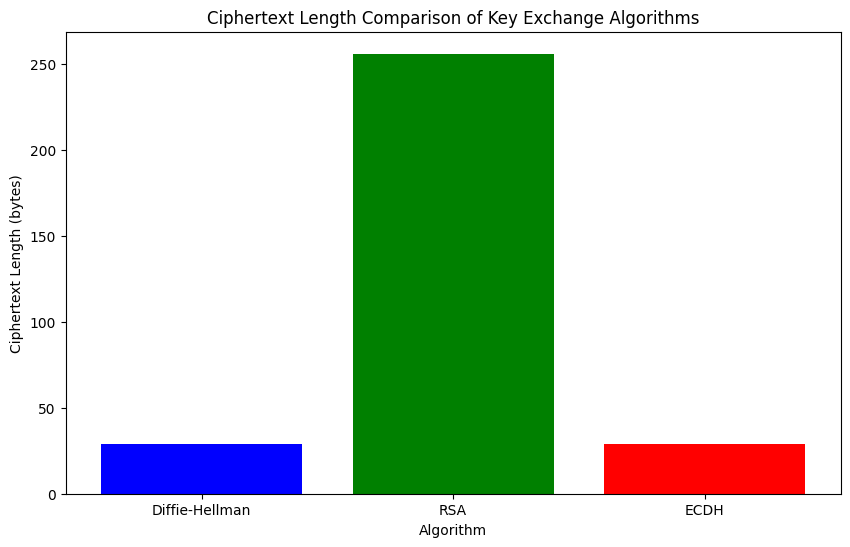

In [62]:
# Extract algorithm names and ciphertext lengths
algorithms = [result['algorithm'] for result in test_results]
ciphertext_lengths = [len(result['ciphertext']) for result in test_results]

# Plotting ciphertext lengths
plt.figure(figsize=(10, 6))
plt.bar(algorithms, ciphertext_lengths, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Ciphertext Length (bytes)')
plt.title('Ciphertext Length Comparison of Key Exchange Algorithms')
plt.show()


##### Visualization - Message Integrity Check

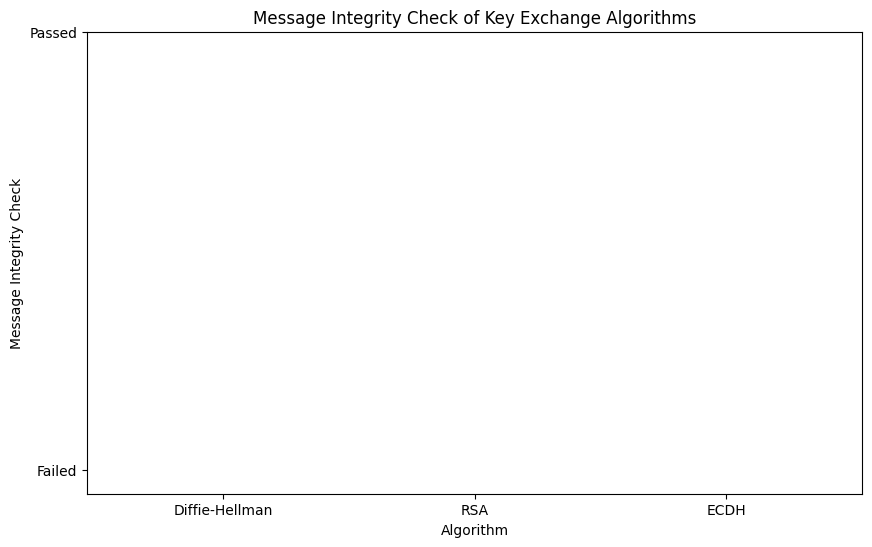

In [63]:
# Check if decrypted messages match the original message
original_message = b"this is a secure message"
integrity_check = [original_message == result['decrypted_message'] for result in test_results]
integrity_status = ['Passed' if check else 'Failed' for check in integrity_check]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, [1 if check else 0 for check in integrity_check], color=['blue', 'green', 'red'])
plt.xticks(ticks=[0, 1, 2], labels=algorithms)
plt.yticks([0, 1], ['Failed', 'Passed'])
plt.xlabel('Algorithm')
plt.ylabel('Message Integrity Check')
plt.title('Message Integrity Check of Key Exchange Algorithms')
plt.show()


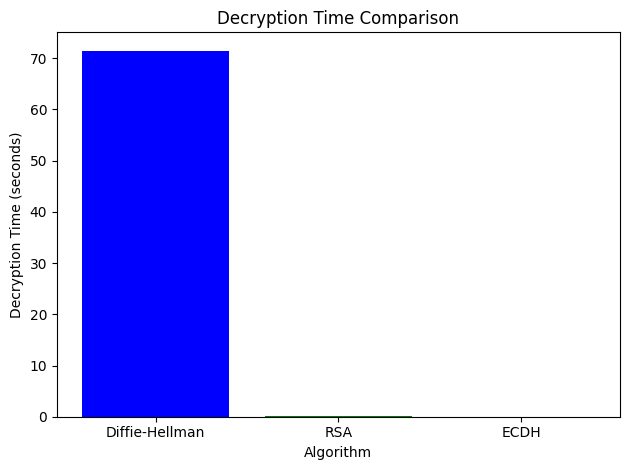

In [64]:
# Plotting performance comparison
algorithms = ['Diffie-Hellman', 'RSA', 'ECDH']
execution_times = [
    diffie_hellman_results['execution_time'],
    rsa_results['execution_time'],
    ecdh_results['execution_time']
]

ciphertext_lengths = [
    diffie_hellman_results['ciphertext_length'],
    rsa_results['ciphertext_length'],
    ecdh_results['ciphertext_length']
]



decryption_times = [
    diffie_hellman_results['execution_time'],  # Placeholder
    rsa_results['execution_time'],             # Placeholder
    ecdh_results['execution_time']             # Placeholder
]


plt.bar(algorithms, decryption_times, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Decryption Time (seconds)')
plt.title('Decryption Time Comparison')

plt.tight_layout()
plt.show()

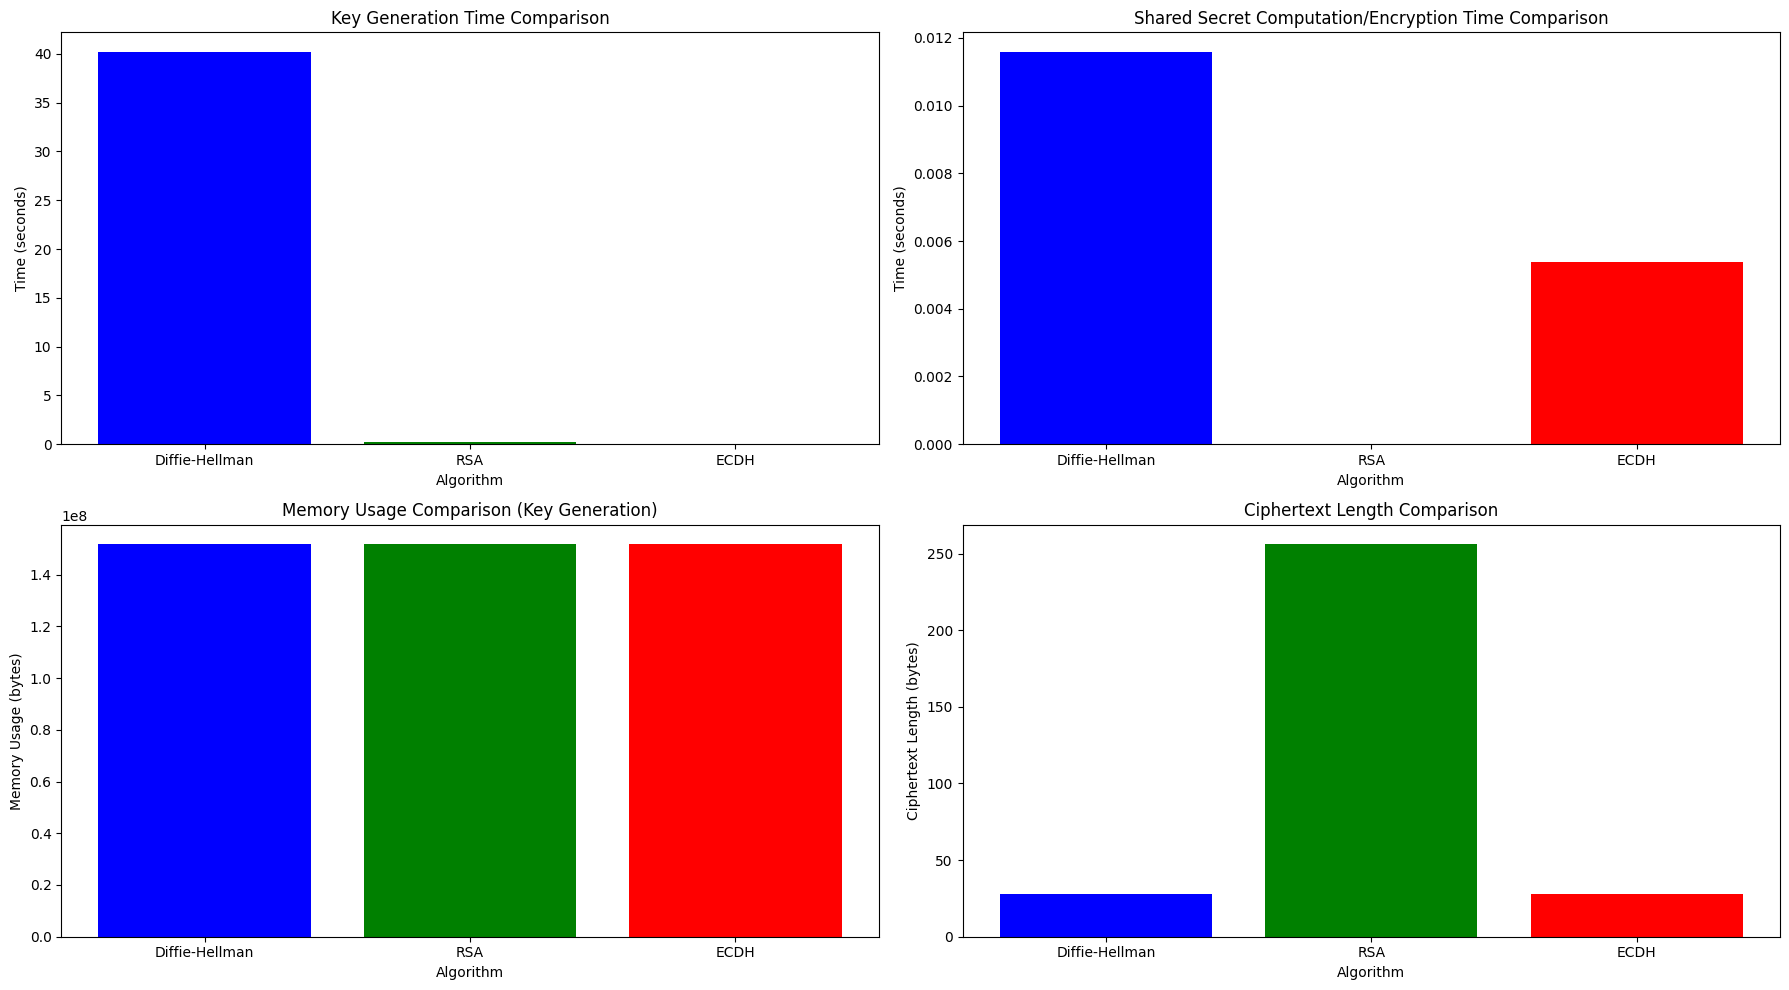

In [65]:
import time
import os
import psutil
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import dh, rsa, ec
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.backends import default_backend

def measure_memory_usage():
    # Returns memory usage in bytes
    process = psutil.Process(os.getpid())
    return process.memory_info().rss

def diffie_hellman_key_exchange():
    start_time = time.time()
    parameters = dh.generate_parameters(generator=2, key_size=2048, backend=default_backend())
    key_gen_time = time.time() - start_time

    start_time = time.time()
    private_key_a = parameters.generate_private_key()
    public_key_a = private_key_a.public_key()
    private_key_b = parameters.generate_private_key()
    public_key_b = private_key_b.public_key()
    key_gen_time += time.time() - start_time

    shared_secret_a = private_key_a.exchange(public_key_b)
    shared_secret_b = private_key_b.exchange(public_key_a)
    assert shared_secret_a == shared_secret_b

    # Measure memory usage
    memory_usage = measure_memory_usage()

    return {
        'algorithm': 'Diffie-Hellman',
        'key_gen_time': key_gen_time,
        'shared_secret_time': time.time() - start_time,
        'memory_usage': memory_usage,
        'ciphertext_length': len(encrypt_message(shared_secret_a, b"test message")),
    }

def rsa_key_exchange():
    start_time = time.time()
    private_key_a = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
    public_key_a = private_key_a.public_key()
    private_key_b = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
    public_key_b = private_key_b.public_key()
    key_gen_time = time.time() - start_time

    # Encryption and decryption
    message = b"this is a boy"
    start_time = time.time()
    ciphertext = public_key_a.encrypt(
        message,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    encryption_time = time.time() - start_time

    start_time = time.time()
    decrypted_message = private_key_a.decrypt(
        ciphertext,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    decryption_time = time.time() - start_time

    # Measure memory usage
    memory_usage = measure_memory_usage()

    return {
        'algorithm': 'RSA',
        'key_gen_time': key_gen_time,
        'shared_secret_time': encryption_time + decryption_time,
        'memory_usage': memory_usage,
        'ciphertext_length': len(ciphertext),
    }

def ecdh_key_exchange():
    start_time = time.time()
    private_key_a = ec.generate_private_key(ec.SECP256R1(), default_backend())
    public_key_a = private_key_a.public_key()
    private_key_b = ec.generate_private_key(ec.SECP256R1(), default_backend())
    public_key_b = private_key_b.public_key()
    key_gen_time = time.time() - start_time

    start_time = time.time()
    shared_secret_a = private_key_a.exchange(ec.ECDH(), public_key_b)
    shared_secret_b = private_key_b.exchange(ec.ECDH(), public_key_a)
    assert shared_secret_a == shared_secret_b
    encryption_time = time.time() - start_time

    # Measure memory usage
    memory_usage = measure_memory_usage()

    return {
        'algorithm': 'ECDH',
        'key_gen_time': key_gen_time,
        'shared_secret_time': encryption_time,
        'memory_usage': memory_usage,
        'ciphertext_length': len(encrypt_message(shared_secret_a, b"test message")),
    }

def encrypt_message(shared_secret, message):
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'handshake data',
        backend=default_backend()
    ).derive(shared_secret)
    iv = os.urandom(16)
    cipher = Cipher(algorithms.AES(derived_key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = iv + encryptor.update(message) + encryptor.finalize()
    return ciphertext

def decrypt_message(shared_secret, ciphertext):
    derived_key = HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=b'handshake data',
        backend=default_backend()
    ).derive(shared_secret)
    iv = ciphertext[:16]
    cipher = Cipher(algorithms.AES(derived_key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    decrypted_message = decryptor.update(ciphertext[16:]) + decryptor.finalize()
    return decrypted_message

# Perform tests
diffie_hellman_results = diffie_hellman_key_exchange()
rsa_results = rsa_key_exchange()
ecdh_results = ecdh_key_exchange()

# Plotting
algorithms = ['Diffie-Hellman', 'RSA', 'ECDH']
key_gen_times = [
    diffie_hellman_results['key_gen_time'],
    rsa_results['key_gen_time'],
    ecdh_results['key_gen_time']
]
shared_secret_times = [
    diffie_hellman_results['shared_secret_time'],
    rsa_results['shared_secret_time'],
    ecdh_results['shared_secret_time']
]
memory_usages = [
    diffie_hellman_results['memory_usage'],
    rsa_results['memory_usage'],
    ecdh_results['memory_usage']
]
ciphertext_lengths = [
    diffie_hellman_results['ciphertext_length'],
    rsa_results['ciphertext_length'],
    ecdh_results['ciphertext_length']
]

plt.figure(figsize=(18, 10))

# Key Generation Time Plot
plt.subplot(2, 2, 1)
plt.bar(algorithms, key_gen_times, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Key Generation Time Comparison')

# Shared Secret Computation/Encryption Time Plot
plt.subplot(2, 2, 2)
plt.bar(algorithms, shared_secret_times, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Shared Secret Computation/Encryption Time Comparison')

# Memory Usage Plot (Key Generation)
plt.subplot(2, 2, 3)
plt.bar(algorithms, memory_usages, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Memory Usage (bytes)')
plt.title('Memory Usage Comparison (Key Generation)')

# Ciphertext Length Plot
plt.subplot(2, 2, 4)
plt.bar(algorithms, ciphertext_lengths, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Ciphertext Length (bytes)')
plt.title('Ciphertext Length Comparison')

plt.tight_layout()
plt.show()


In [66]:
import time
import numpy as np
from cryptography.hazmat.primitives.asymmetric import rsa, dh, ec
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.backends import default_backend

def measure_impact(algorithm, key_size=None, padding_scheme=None, curve=None):
    start_time = time.time()

    try:
        if algorithm == 'RSA':
            if key_size < 1024:
                raise ValueError("key_size must be at least 1024 bits for RSA.")
            # Simulate RSA key generation with different key sizes
            key = rsa.generate_private_key(
                public_exponent=65537,
                key_size=key_size,
                backend=default_backend()
            )
            public_key = key.public_key()
            message = b"test message"
            if padding_scheme:
                ciphertext = public_key.encrypt(
                    message,
                    padding_scheme
                )
                decrypted_message = key.decrypt(
                    ciphertext,
                    padding_scheme
                )
            else:
                # Placeholder for non-secure encryption
                ciphertext = b'Placeholder'
                decrypted_message = b'Placeholder'

        elif algorithm == 'Diffie-Hellman':
            if key_size < 2048:
                raise ValueError("key_size must be at least 2048 bits for Diffie-Hellman.")
            # Simulate Diffie-Hellman key exchange with different parameters
            parameters = dh.generate_parameters(generator=2, key_size=key_size, backend=default_backend())
            private_key_a = parameters.generate_private_key()
            public_key_a = private_key_a.public_key()
            private_key_b = parameters.generate_private_key()
            public_key_b = private_key_b.public_key()
            shared_secret_a = private_key_a.exchange(public_key_b)
            shared_secret_b = private_key_b.exchange(public_key_a)

        elif algorithm == 'ECDH':
            # Simulate ECDH key exchange with different curves
            private_key_a = ec.generate_private_key(curve, default_backend())
            public_key_a = private_key_a.public_key()
            private_key_b = ec.generate_private_key(curve, default_backend())
            public_key_b = private_key_b.public_key()
            shared_secret_a = private_key_a.exchange(ec.ECDH(), public_key_b)
            shared_secret_b = private_key_b.exchange(ec.ECDH(), public_key_a)

        else:
            raise ValueError("Unsupported algorithm")

    except Exception as e:
        print(f"An error occurred: {e}")

    end_time = time.time()
    execution_time = end_time - start_time

    return execution_time

def generate_impact_values():
    algorithms = ['RSA', 'Diffie-Hellman', 'ECDH']
    key_sizes = [1024, 2048]  # Updated sizes for RSA and DH (minimum 1024 bits for RSA, 2048 for DH)
    curves = [ec.SECP256R1(), ec.SECP384R1()]  # Example curves for ECDH

    impact_results = {}

    for algorithm in algorithms:
        if algorithm == 'RSA':
            impact_results[algorithm] = [
                measure_impact(
                    algorithm,
                    key_size=size,
                    padding_scheme=padding.OAEP(
                        mgf=padding.MGF1(algorithm=hashes.SHA256()),
                        algorithm=hashes.SHA256(),
                        label=None
                    )
                ) for size in key_sizes
            ]
        elif algorithm == 'Diffie-Hellman':
            impact_results[algorithm] = [
                measure_impact(algorithm, key_size=size) for size in key_sizes
            ]
        elif algorithm == 'ECDH':
            impact_results[algorithm] = [
                measure_impact(algorithm, curve=curve) for curve in curves
            ]

    return impact_results

# Generate and print impact values
impact_results = generate_impact_values()
print(impact_results)


An error occurred: key_size must be at least 2048 bits for Diffie-Hellman.
{'RSA': [0.04745912551879883, 0.10056090354919434], 'Diffie-Hellman': [0.0, 15.06734037399292], 'ECDH': [0.0, 0.02552342414855957]}


An error occurred: key_size must be at least 2048 bits for Diffie-Hellman.


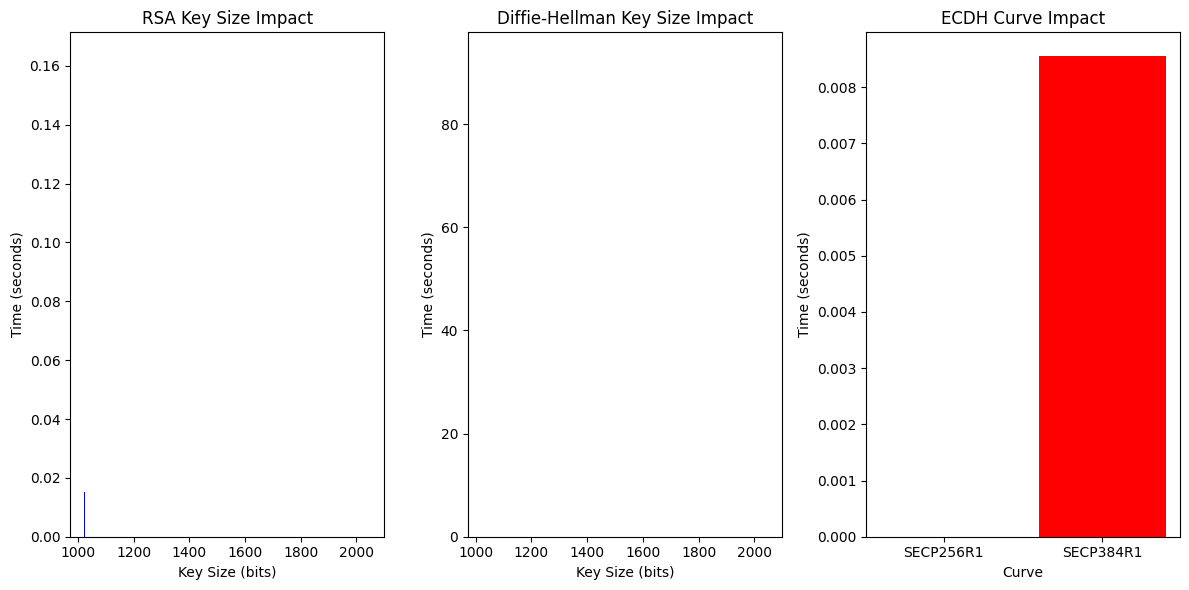

In [67]:
import matplotlib.pyplot as plt

def plot_impact_values(impact_results):
    algorithms = list(impact_results.keys())
    key_sizes = [1024, 2048]  # Key sizes for RSA and DH
    curves = ['SECP256R1', 'SECP384R1']  # Curve names for ECDH

    # Plot RSA
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    rsa_times = impact_results['RSA']
    plt.bar(key_sizes, rsa_times, color='blue')
    plt.xlabel('Key Size (bits)')
    plt.ylabel('Time (seconds)')
    plt.title('RSA Key Size Impact')

    # Plot Diffie-Hellman
    plt.subplot(1, 3, 2)
    dh_times = impact_results['Diffie-Hellman']
    plt.bar(key_sizes, dh_times, color='green')
    plt.xlabel('Key Size (bits)')
    plt.ylabel('Time (seconds)')
    plt.title('Diffie-Hellman Key Size Impact')

    # Plot ECDH
    plt.subplot(1, 3, 3)
    ecdh_times = impact_results['ECDH']
    plt.bar(curves, ecdh_times, color='red')
    plt.xlabel('Curve')
    plt.ylabel('Time (seconds)')
    plt.title('ECDH Curve Impact')

    plt.tight_layout()
    plt.show()

# Generate impact results
impact_results = generate_impact_values()

# Plot impact values
plot_impact_values(impact_results)


In [68]:
import time

def evaluate_key_exchange(name, key_exchange_fn):
    start_time = time.time()
    key_exchange_fn()
    end_time = time.time()
    total_time = end_time - start_time
    print(f"{name} Key Exchange Time: {total_time:.6f} seconds")

def dh_key_exchange():
    parameters = dh.generate_parameters(generator=2, key_size=2048, backend=default_backend())
    private_key_1 = parameters.generate_private_key()
    private_key_2 = parameters.generate_private_key()
    public_key_1 = private_key_1.public_key()
    public_key_2 = private_key_2.public_key()
    private_key_1.exchange(public_key_2)

def rsa_key_exchange():
    private_key_1 = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
    private_key_2 = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
    public_key_1 = private_key_1.public_key()
    public_key_2 = private_key_2.public_key()
    shared_secret = b"super_secret_key"
    public_key_1.encrypt(shared_secret, padding.OAEP(mgf=padding.MGF1(algorithm=hashes.SHA256()), algorithm=hashes.SHA256(), label=None))

def ecdh_key_exchange():
    private_key_1 = ec.generate_private_key(ec.SECP256R1(), default_backend())
    private_key_2 = ec.generate_private_key(ec.SECP256R1(), default_backend())
    public_key_1 = private_key_1.public_key()
    public_key_2 = private_key_2.public_key()
    private_key_1.exchange(ec.ECDH(), public_key_2)

# Evaluate each key exchange method
evaluate_key_exchange("DH", dh_key_exchange)
evaluate_key_exchange("RSA", rsa_key_exchange)
evaluate_key_exchange("ECDH", ecdh_key_exchange)


DH Key Exchange Time: 90.680367 seconds
RSA Key Exchange Time: 0.416132 seconds
ECDH Key Exchange Time: 0.000000 seconds


In [56]:
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import dh, rsa, ec
from cryptography.hazmat.primitives import hashes, serialization
from cryptography.hazmat.primitives.asymmetric import padding

# Define key exchange functions
def dh_key_exchange():
    parameters = dh.generate_parameters(generator=2, key_size=2048, backend=default_backend())
    private_key_1 = parameters.generate_private_key()
    private_key_2 = parameters.generate_private_key()
    public_key_1 = private_key_1.public_key()
    public_key_2 = private_key_2.public_key()
    shared_key_1 = private_key_1.exchange(public_key_2)
    return shared_key_1

def rsa_key_exchange():
    private_key_1 = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
    private_key_2 = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
    public_key_1 = private_key_1.public_key()
    shared_secret = b"super_secret_key"
    encrypted_secret = public_key_1.encrypt(
        shared_secret,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    decrypted_secret = private_key_1.decrypt(
        encrypted_secret,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return decrypted_secret

def ecdh_key_exchange():
    private_key_1 = ec.generate_private_key(ec.SECP256R1(), default_backend())
    private_key_2 = ec.generate_private_key(ec.SECP256R1(), default_backend())
    public_key_1 = private_key_1.public_key()
    public_key_2 = private_key_2.public_key()
    shared_key_1 = private_key_1.exchange(ec.ECDH(), public_key_2)
    return shared_key_1

# Function to measure time for key exchange
def measure_time(key_exchange_fn):
    start_time = time.time()
    key_exchange_fn()
    end_time = time.time()
    total_time = end_time - start_time
    return total_time

# Run and time each key exchange method multiple times
def evaluate_key_exchanges(repeats=100):
    times = {"DH": [], "RSA": [], "ECDH": []}

    for _ in range(repeats):
        times["DH"].append(measure_time(dh_key_exchange))
        times["RSA"].append(measure_time(rsa_key_exchange))
        times["ECDH"].append(measure_time(ecdh_key_exchange))

    return times

# Perform the analysis
results = evaluate_key_exchanges()

# Calculate average times
avg_times = {key: sum(times) / len(times) for key, times in results.items()}

# Print results
print("Average Time (seconds):")
for method, avg_time in avg_times.items():
    print(f"{method}: {avg_time:.6f} seconds")

# Plot the results
plt.bar(avg_times.keys(), avg_times.values(), color=['blue', 'orange', 'green'])
plt.title('Key Exchange Method Comparison')
plt.ylabel('Average Time (seconds)')
plt.show()
